# Solutions to Exercises (not Activities) in the Bohemian Unit

1: Write down as many questions as you can for this unit.

Maybe this is the most important one of these in this book (OER).  Your questions are as likely as ours to be productive.  But, here are some of ours.  Most have no answers that we know of.  In no particular order, here we go. For a given integer polynomial, which companion Bohemian matrix has _minimal_ height? Which matrix in the family has the maximum determinant?  Which matrix in the family has the maximum characteristic height? Minimum nonzero determinant? How many matrices are singular? How many are stable? How many have multiple eigenvalues? How many nilpotent matrices are there? How many non-normal matrices are there?  How many commuting pairs are there? What is the distribution of eigenvalue condition numbers? How many different eigenvalues are there?  How many matrices have a given characteristic polynomial? How many have nontrivial Jordan form? How many have nontrivial Smith form? How many are orthogonal? unimodular? How many matrices have inverses that are also Bohemian? With the same height? (In this case we say the matrix family has _rhapsody_). Given the eigenvalues, can we find a matrix in the family with those eigenvalues? 

The colouring scheme we settled on uses an approximate inversion of the cumulative density function and maps that onto a _perceptually even_ sequential colour map like viridis or cividis.  We have only just begun to explore more sophisticated schemes, but this one has the advantage that you can sort of "see" the probability density in the colours.  Are there better methods?  Can we do this usefully in $3D$?  What about multi-dimensional problems? Tensors?

2: Looking back at the Fractals Unit, there seem to be clear connections with this unit.  Discuss them.

Some of the Bohemian eigenvalue pictures are suggestive of fractals, especially the upper Hessenberg zero diagonal Toeplitz ones.  In fact we have just managed to prove that Sierpinski-like triangles genuinely appear in some of these (when the population has three elements).  In some other cases we think we have also managed to prove that in the limit as $m\to\infty$ we get a genuine fractal.  We can't think of a way to connect the Julia set idea, though.

3: Looking back at the Rootfinding Unit, there seem to be clear connections with this unit.  Discuss them.

Mostly the connection is practical: we want a good way to find all the roots of the characteristic polynomial (when we go that route, possibly because of the compression factor).  Newton's method can be used (sometimes!) to "polish" the roots to greater accuracy, for instance.  

4: Looking back at the Continued Fractions Unit, it seems a stretch to connect them.  Can you find a connection?

__One connection__: We thought of taking a general matrix and letting its entries be the partial quotients of the continued fraction of a number chosen "at random" in $[0,1)$.  To make that "at random" have the right distribution turned out to be simple enough, because the distribution of partial quotients is known (called the [Gauss-Kuzmin distribution](https://en.wikipedia.org/wiki/Gauss–Kuzmin_distribution)) and its relation to the probability distribution of the iterates $x_n$ of the Gauss map is also known (and called the "Gauss measure"). This is
\begin{equation}
F(x) = \frac{1}{\ln 2}\int_{t=0}^x \frac{1}{1+t}\,dt = \mathrm{lg}(1+x)
\end{equation}
where the symbol lg means "log to base 2" and is frequently seen in computer science.  We can invert this cumulative distribution by solving $u=\mathrm{lg}(1+x)$ by raising both sides to the power $2$, like so: $2^u = 1+x$ so $x=2^u-1$.  Therefore, sampling $u$ uniformly on $(0,1)$ will give $x$ distributed on $(0,1)$ according to the Gauss measure; then taking the fractional part of $1/x$ will give us the partial quotients with the correct distribution.

Doing this a large number of times and plotting the eigenvalue density we get a very interesting image; we're still thinking about it. We were surprised that there was a pattern, and we don't yet know how to explain it. This isn't _quite_ a Bohemian matrix problem, because the partial quotients of most numbers are unbounded.  Still, very large entries are not likely, even though this is quite definitely what is known as a "heavy-tailed distribution" or "fat-tailed distribution".  The expected value of a partial quotient is infinity!  The use of floating-point essentially bounds the largest entry in practice; we do not know what this does to the statistics.

__Another way to connect__ continued fractions to Bohemian matrices might be to compute the continued fractions of the eigenvalues of one of our earlier computations, and see if there was any correlation with the "holes" (there might be&mdash;we have not tried this).

In [1]:
import itertools
import random
import numpy as np
from numpy.polynomial import Polynomial as Poly
import matplotlib as plt
import time
import csv
import math
from PIL import Image
import json
import ast
import sys
sys.path.insert(0,'../../code')
from bohemian_inheritance import *
from densityPlot import *

Bounding box is width 2*64.01805876140122


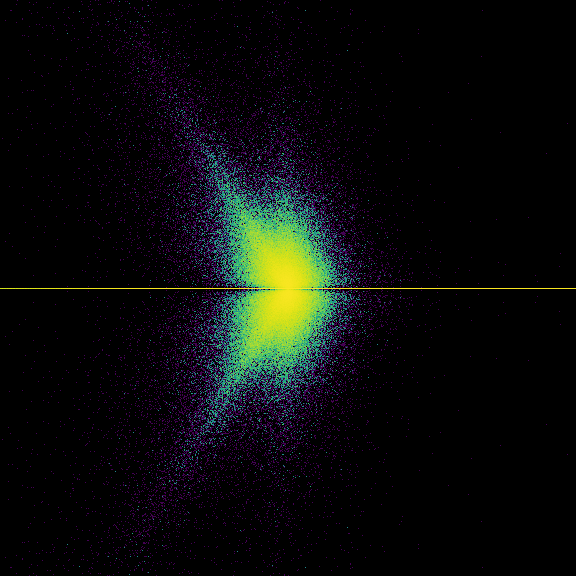

Took 7.880784034729004 seconds to compute and plot 


In [3]:
rng = np.random.default_rng(2022)
# We will convert uniform floats u on (0,1) to
# floats that have the Gauss measure by x = 2^u - 1
# and this will get the right distribution of partial quotients

# This lambda function replaced by broadcast operations which are faster
# partial_quotient = lambda u: math.floor( 1/(2**u-1)) # u=0 is unlikely

# 5000 in 1.5 seconds, 50,000 in 12 seconds, 500,000 in 2 minutes, 1 million in 4 minutes
# six hours and 14 minutes for one hundred million matrices at mdim=13
Nsample = 1*10**5 
mdim = 6
A = Bohemian(mdim)
sequencelength = A.getNumberOfMatrixEntries()
one = np.ones(sequencelength)
two = 2*one
start = time.time()
B =  0.6*mdim*(Nsample)**(0.25)
print( "Bounding box is width 2*{}".format(B))
bounds = [-B,B,-B,B] # Found by experiment; Depends on Nsample!
nrow = math.floor(9*B)  # These need to be adjusted depending on Nsample as well
ncol = math.floor(9*B)
image = DensityPlot(bounds, nrow, ncol)
for k in range(Nsample):
    u = rng.random(size=sequencelength)
    r = np.power(two,u)-one
    p = np.floor_divide(one,r)
    A.makeMatrix( p )
    image.addPoints(A.eig())

# We encode the population into a label which we will use for the filename.
poplabel = "ContinuedFraction"
cmap = 'viridis'
fname = '../Supplementary Material/Bohemian/dense/pop_{}_{}_{}N{}.png'.format(poplabel,cmap,mdim,Nsample)
image.makeDensityPlot(cmap, filename=fname, bgcolor=[0, 0, 0, 1], colorscale="cumulative")
finish = time.time()
print("Took {} seconds to compute and plot ".format(finish-start))
